<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [58]:
from IPython.display import YouTubeVideo

#YouTubeVideo('Jml7NVYm8cs')

In [79]:
%pwd

'/Users/taylorcurran/lmd/unit4/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [80]:
pd.__version__

'1.0.3'

In [60]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [61]:
# Start here 
# ----------------------------------------------------------------------------

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [62]:
shops['full_review_text'].value_counts().nlargest(3)
# Yeah clearly this won't work...
# Also, is there an accedentale 2X duplicate of data entry?

 10/16/2016 My only complaint and desire and heart wish is for this place to be open longer and to allow for Wifi. This place makes my heart happy, it motivates me to study because I want to come here, and it makes me wish I had time to settle and read a wonderful book. The atmosphere is PERFECT, the workers are GENEROUS AND KIND, it's a beautiful place to be.               4
 11/11/2016 I never write Yelp reviews, ever. But when I walked in here it felt like I was in a hipster Alice in wonderland. The decor is spot on and they left no details out. The Marymint Monroe is really amazing and the chicken and waffle is really good. The staff is so wonderful too, you could tell they really love what they're doing. The swings are a nice touch too!     4
 10/28/2016 AMAZING atmosphere! I walked around for 5 minutes looking at everything before even ordering.  Most unique take on chicken and waffles I've ever had. Hands down best night time hangout in North Austin. P.S.... their Matcha Latte i

In [63]:
# For less typing
reviews = shops['full_review_text']

reviews.nunique()

6915

In [64]:
# Case Normalization
reviews = reviews.apply(lambda x: x.lower())
reviews.nunique()

6915

In [65]:
# Keeping Only Alphanumeric
# Regex Expression for Alphanumeric = [^a-zA-z 0-9]

# Library for Regex
import re

# Returns only characters that are Aplhanumeric
#re.sub('[^a-zA-z 0-9]', '', string)

In [66]:
def tokenize(text):
    """Returns basic tokens"""
    tokens = re.sub('[^a-zA-z 0-9]', '', text)
    tokens = tokens.lower().split()
    
    return tokens

In [67]:
# For better way to apply the tokenize function, see .apply() below
tokened_reviews = []
for review in reviews:
    tokened_reviews.append(tokenize(review))

In [68]:
len(tokened_reviews) == len(reviews)

True

In [69]:
# Improvement on above code
reviews = reviews.apply(tokenize)

In [70]:
reviews.head()

0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: full_review_text, dtype: object

In [71]:
from collections import Counter
import re

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

# ?-- Why this line? --?
nlp = spacy.load("en_core_web_lg")

In [72]:
# The object 'Counter' takes an iterable,
# but here we instantiate an empty one and update it:
word_counts = Counter()

# .apply takes a funciton as an argument,
# ... sometimes its easier to use a lambda function
# Here we essentially apply the Counter object, word_counts, 
# an instance of the Counter class, to our reviews series
reviews.apply(lambda x: word_counts.update(x))

# ?-- Does the ^above^ line create a new thing? --?
# Yes, it creates a set as seen in next cell.

# Print out the 10 most common words
word_counts.most_common(10)

[('the', 34807),
 ('and', 26649),
 ('a', 22755),
 ('i', 20237),
 ('to', 17164),
 ('of', 12600),
 ('is', 11999),
 ('coffee', 10353),
 ('was', 9707),
 ('in', 9546)]

In [73]:
print(type(word_counts))
print("length", len(word_counts))
#word_counts
# ^long output

<class 'collections.Counter'>
length 22067


In [74]:
# RN, reviews is a series of lists...
# ... this may not be the most convenient data form 
print(type(reviews))
print(reviews.shape)
reviews.head()

<class 'pandas.core.series.Series'>
(7616,)


0    [11252016, 1, checkin, love, love, loved, the,...
1    [1222016, listed, in, date, night, austin, amb...
2    [11302016, 1, checkin, listed, in, brunch, spo...
3    [11252016, very, cool, decor, good, drinks, ni...
4    [1232016, 1, checkin, they, are, located, with...
Name: full_review_text, dtype: object

In [97]:
def count(docs):
    """takes a corpus of document and 
    returns a dataframe of word counts for easy analysis"""
    
    # Instantiate two Counter Objects
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        # Here we 'fit' the Counter functionality to each doc
        word_counts.update(doc)
        # Here we 'fit' the Counter functionality to each word that occurs
        # at least one time... appears_in will have no repeats...
        # ?-- So why are we updating a counter object with it? --?
        # ?-- What would be the point? --?
        appears_in.update(set(doc))
    
    # Zipping creates a list of corresponding tuples
    # Here we are changing a dictionary to a list of tupples.
    temp = zip(word_counts.keys(), word_counts.values())
    
    # Dataframe is created from word/count tuples
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    # A column in added that ranks each word by count
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    # Total tokens in this corpus
    total = wc['count'].sum()
    
    # Create a percent total column 
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    # Sort df index by rank
    wc = wc.sort_values(by='rank')
    
    # Find cumulative total and make it a column
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [95]:
# Use the Function
wc = count(reviews)

In [96]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
49,the,6847,34807,1.0,0.044534,0.044534,0.899028
52,and,6864,26649,2.0,0.034096,0.078629,0.901261
16,a,6246,22755,3.0,0.029114,0.107743,0.820116
72,i,5528,20237,4.0,0.025892,0.133635,0.725840
13,to,5653,17164,5.0,0.021960,0.155595,0.742253


In [90]:
wc.tail()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
22061,roomier,1,1,22063.0,0.000001,0.999995,0.000131
22062,windowed,1,1,22064.0,0.000001,0.999996,0.000131
22063,actuality,1,1,22065.0,0.000001,0.999997,0.000131
22064,crass,1,1,22066.0,0.000001,0.999999,0.000131
22065,digestion,1,1,22067.0,0.000001,1.000000,0.000131


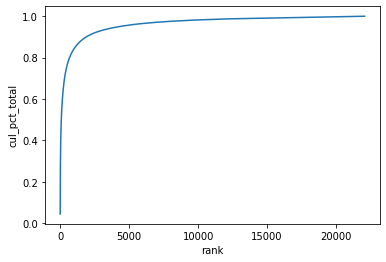

In [98]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

